In [15]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the WhatsApp chat file
with open('WhatsApp Chat with Das A&B - Batch 2021-2026.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()


# Preprocess the chat data
def preprocess_chat(chat_data):
    messages = []
    for line in chat_data:
        match = re.match(r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s*[APap][Mm]\s*-\s*(.*?):\s*(.*)', line)
        if match:
            
            message = match.group(2)
            messages.append(message)
    return messages

# Extract messages
messages = preprocess_chat(chat_data)

# Convert to DataFrame
df = pd.DataFrame({'message': messages})

# Preprocess text (remove stopwords and special characters)
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# Convert the 'cleaned_message' column to strings to avoid errors
df['cleaned_message'] = df['cleaned_message'].astype(str)

# Remove empty or very short messages after cleaning
df = df[df['cleaned_message'].str.len() > 3]

# Check if we still have valid messages after filtering
if df.empty:
    raise ValueError("All messages were filtered out during preprocessing. Ensure your data contains valid messages.")

# Perform LDA to find topics if we have valid data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Check if any vocabulary remains after cleaning and filtering
if df['cleaned_message'].str.strip().empty:
    raise ValueError("No valid vocabulary remains after preprocessing. Please check your data and preprocessing steps.")

# Fit the CountVectorizer
dtm = vectorizer.fit_transform(df['cleaned_message'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Get topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic 0:
section roll noted das hour ur today pm hall form
Topic 1:
mam yes class come link meet roll das immediately okay
Topic 2:
mam ok class attend dear students plz pass department submit
Topic 3:
omitted media https day free form 2023 intranet applied anokha
Topic 4:
message deleted class list hall students pm viva today 12


Top keywords with TF-IDF scores:
         word       score
462   message  165.842356
186   deleted  160.586455
119     class  130.463697
296      guys   83.553550
399       lab   76.494410
830  tomorrow   59.991695
824     today   56.333300
729       sir   52.541551
924       yes   50.092475
134      come   44.732744


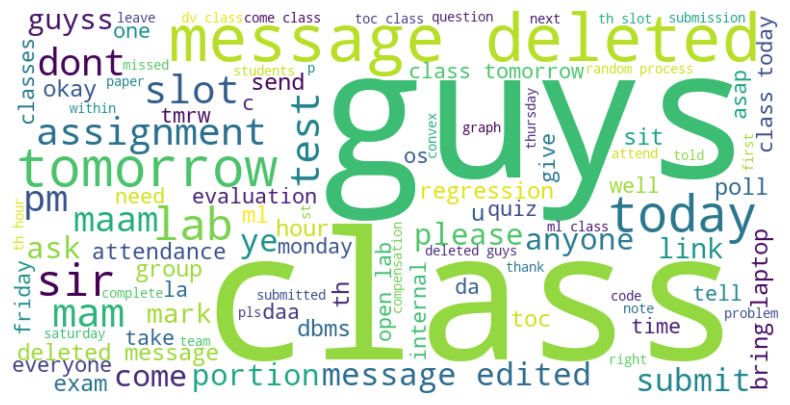

In [25]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the WhatsApp chat file
file_path = 'WhatsApp Chat.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Preprocess the chat data
def preprocess_chat(chat_data):
    messages = []
    for line in chat_data:
        match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)
        if match:
            message = match.group(4)  # Capture the actual message
            if '<Media omitted>' not in message and 'http' not in message:  # Filter out media and links
                messages.append(message)
    return messages

# Extract messages
messages = preprocess_chat(chat_data)

# Convert to DataFrame
df = pd.DataFrame({'message': messages})

# Preprocess text (remove stopwords, special characters, and numbers)
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# Ensure the 'cleaned_message' column is of type string
df['cleaned_message'] = df['cleaned_message'].astype(str)

# Remove empty messages after cleaning
df = df[df['cleaned_message'].str.strip() != '']

# Check if we still have valid messages after filtering
if df.empty:
    raise ValueError("All messages were filtered out during preprocessing. Ensure your data contains valid messages.")

# 1. Keyword Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['cleaned_message'])

# Get feature names (keywords)
feature_names = vectorizer.get_feature_names_out()
important_scores = tfidf_matrix.sum(axis=0).A1  # Sum across documents

# Create a DataFrame with words and their TF-IDF scores
important_df = pd.DataFrame({'word': feature_names, 'score': important_scores})
important_df = important_df.sort_values(by='score', ascending=False).head(10)

print("Top keywords with TF-IDF scores:")
print(important_df)

# 2. Word Cloud Generation
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['cleaned_message']))

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Topic 1:
lab test evaluation maam os open portions marks quiz tomorrow
Topic 2:
guys group assignment ask tell internals pls code got given
Topic 3:
class guys today tomorrow ml lab toc regression sit dbms
Topic 4:
message deleted sir edited submit mam poll assignment daa came
Topic 5:
class slot th come hour yes dont bring guys need


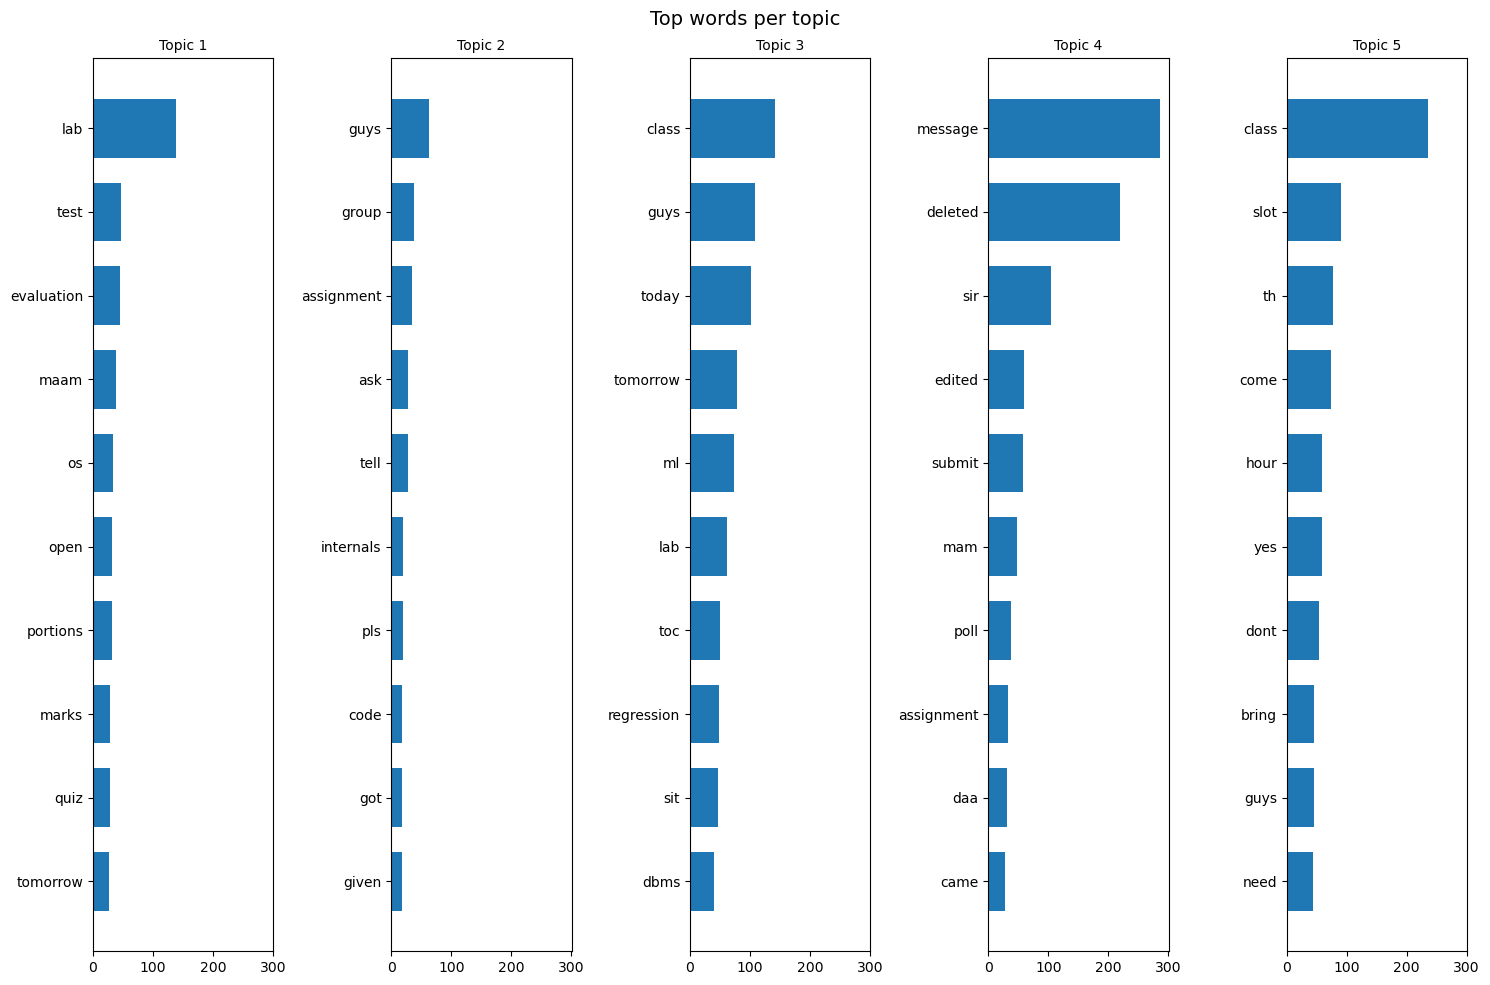

In [26]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Preprocessing function to extract messages
def preprocess_chat(chat_data):
    messages = []
    for line in chat_data:
        match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)
        
        if match:
            message = match.group(4)  # Extract the actual message
            if '<Media omitted>' not in message and 'http' not in message:  # Filter out media and links
                messages.append(message)
    return messages

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract messages
messages = preprocess_chat(chat_data)

# Convert to DataFrame
df = pd.DataFrame({'message': messages})

# Remove empty messages
df['message'] = df['message'].str.strip()
df = df[df['message'] != '']

# Preprocess text (remove stopwords, special characters, and numbers)
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

# Remove empty messages after cleaning
df = df[df['cleaned_message'].str.strip() != '']

# 1. Convert messages into a document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_message'])

# 2. Apply LDA to identify key topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# 3. Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top 10 words for each topic
display_topics(lda, feature_names, 10)

# Optional: Visualizing the word distribution for topics using matplotlib
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot the top 10 words for each topic
plot_top_words(lda, feature_names, 10, 'Top words per topic')


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119821 (\N{MATHEMATICAL BOLD CAPITAL N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119834 (\N{MATHEMATICAL BOLD SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119855 (\N{MATHEMATICAL BOLD SMALL V}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119847 (\N{MATHEMATICAL BOLD SMALL N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 119838 (\N{MATHEMATICAL BOLD SMALL E}) missing from current font.
  fig.canvas.print_figure

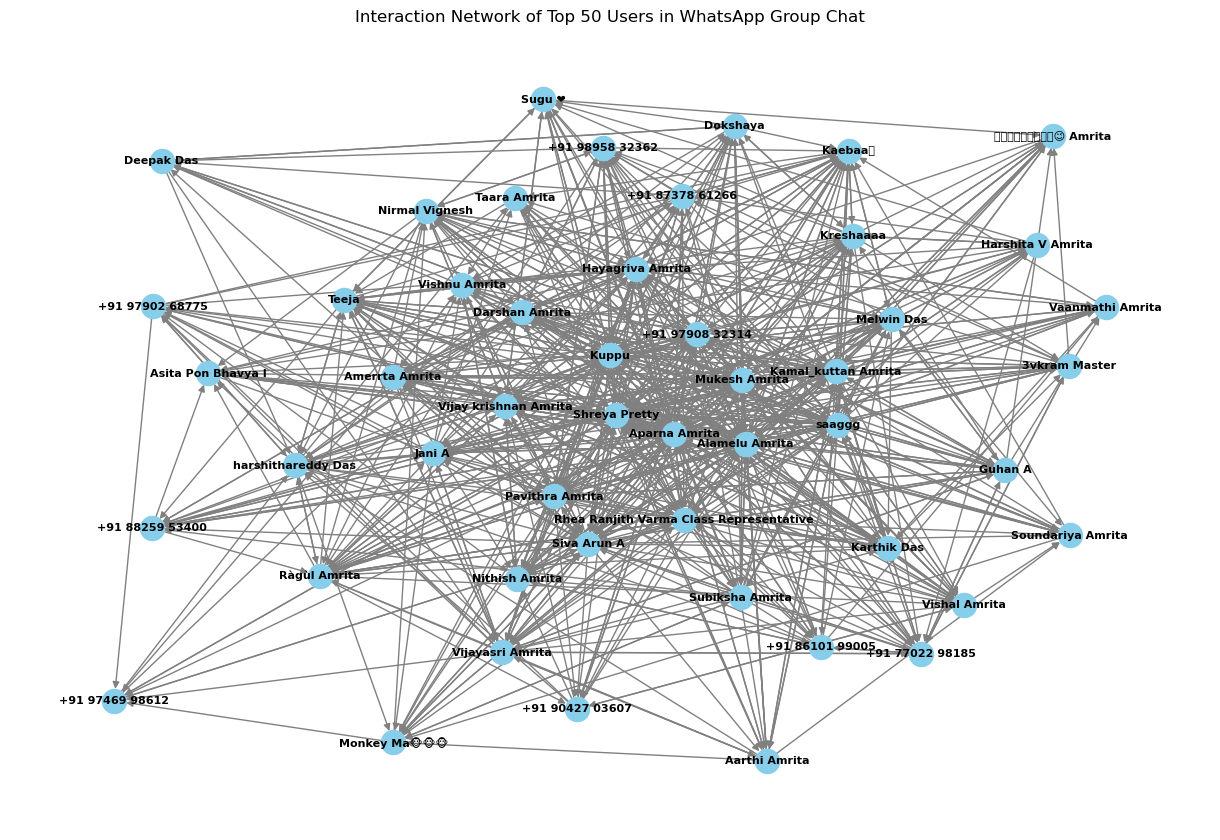

In [28]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Preprocessing function to extract sender and receiver
def preprocess_chat_for_network(chat_data):
    interactions = []
    previous_sender = None
    for line in chat_data:
        match = re.match(r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} - (.*?): (.*)', line)
        if match:
            sender = match.group(1)  # Extract the sender's name
            if previous_sender is not None and sender != previous_sender:
                interactions.append((previous_sender, sender))  # Interaction from previous to current sender
            previous_sender = sender
    return interactions

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract interactions (sender -> receiver)
interactions = preprocess_chat_for_network(chat_data)

# Convert interactions to DataFrame
df_interactions = pd.DataFrame(interactions, columns=['from', 'to'])

# 1. Create a network graph using networkx
G = nx.DiGraph()  # Directed graph since interactions are directed (from one user to another)
G.add_edges_from(interactions)

# 2. Analyze centrality
degree_centrality = nx.degree_centrality(G)

# Sort the users based on degree centrality and limit to top 30
top_30_users = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:50]
top_30_nodes = [user for user, _ in top_30_users]

# Create a subgraph with only the top 30 users
G_top_30 = G.subgraph(top_30_nodes)

# 3. Visualize the network with smaller node sizes and labels for the top 30 users
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_top_30, k=0.5)
nx.draw(G_top_30, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=8, font_weight='bold', edge_color='gray', arrows=True)
plt.title('Interaction Network of Top 50 Users in WhatsApp Group Chat')
plt.show()


In [30]:
import re
import pandas as pd
from datetime import datetime

# Preprocessing function to extract timestamp, sender, and message
def preprocess_chat_for_response_time(chat_data):
    messages = []
    for line in chat_data:
        match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)
        if match:
            timestamp_str = f"{match.group(1)}, {match.group(2)}"
            sender = match.group(3)
            message = match.group(4)
            # Correct the datetime format to match the data format
            timestamp = datetime.strptime(timestamp_str, '%d/%m/%y, %H:%M')  # Convert to datetime
            messages.append((timestamp, sender, message))
    return messages

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract timestamp, sender, and message
messages = preprocess_chat_for_response_time(chat_data)

# Convert messages to DataFrame
df = pd.DataFrame(messages, columns=['timestamp', 'sender', 'message'])

# Sort the DataFrame by timestamp to ensure messages are in chronological order
df = df.sort_values(by='timestamp')

# Calculate response time
response_times = []
previous_sender = None
previous_time = None

for i, row in df.iterrows():
    if previous_sender and previous_sender != row['sender']:
        response_time = (row['timestamp'] - previous_time).total_seconds() / 60.0  # Convert to minutes
        response_times.append((previous_sender, response_time))
    
    previous_sender = row['sender']
    previous_time = row['timestamp']

# Convert response times to DataFrame
df_response_times = pd.DataFrame(response_times, columns=['sender', 'response_time'])

# Calculate average response time per user
average_response_time_per_user = df_response_times.groupby('sender')['response_time'].mean().sort_values()

# 1. Display average response time per user
print("Average Response Time (in minutes) per User:")
print(average_response_time_per_user)

# 2. Find the fastest and slowest responders
fastest_responders = average_response_time_per_user.head(5)
slowest_responders = average_response_time_per_user.tail(5)

print("\nFastest Responders (Top 5):")
print(fastest_responders)

print("\nSlowest Responders (Top 5):")
print(slowest_responders)


Average Response Time (in minutes) per User:
sender
+91 75101 64437        0.500000
+91 82478 29887        0.500000
Aishhh                 1.000000
+91 97456 01100        3.000000
Vishal Amrita          5.294118
                       ...     
+91 86101 99005      697.500000
Vaanmathi Amrita    1251.785714
+91 88486 58409     1287.500000
Monkey Ma🐵🐵🐵        1343.384615
Darshan Amrita      1499.324324
Name: response_time, Length: 61, dtype: float64

Fastest Responders (Top 5):
sender
+91 75101 64437    0.500000
+91 82478 29887    0.500000
Aishhh             1.000000
+91 97456 01100    3.000000
Vishal Amrita      5.294118
Name: response_time, dtype: float64

Slowest Responders (Top 5):
sender
+91 86101 99005      697.500000
Vaanmathi Amrita    1251.785714
+91 88486 58409     1287.500000
Monkey Ma🐵🐵🐵        1343.384615
Darshan Amrita      1499.324324
Name: response_time, dtype: float64


In [31]:
pip install emoji textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 798.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Number of media files shared: 0

URLs Shared (Top 10 domains):
                                       domain  count
6  amritavishwavidyapeetham-my.sharepoint.com     26
0                           chat.whatsapp.com     23
8                         teams.microsoft.com     17
4                            forms.office.com     12
3                             docs.google.com      5
2                                   forms.gle      4
7                                    youtu.be      3
5                            web.stanford.edu      2
1                                 youtube.com      1
9                              www.google.com      1


<Figure size 1200x800 with 0 Axes>

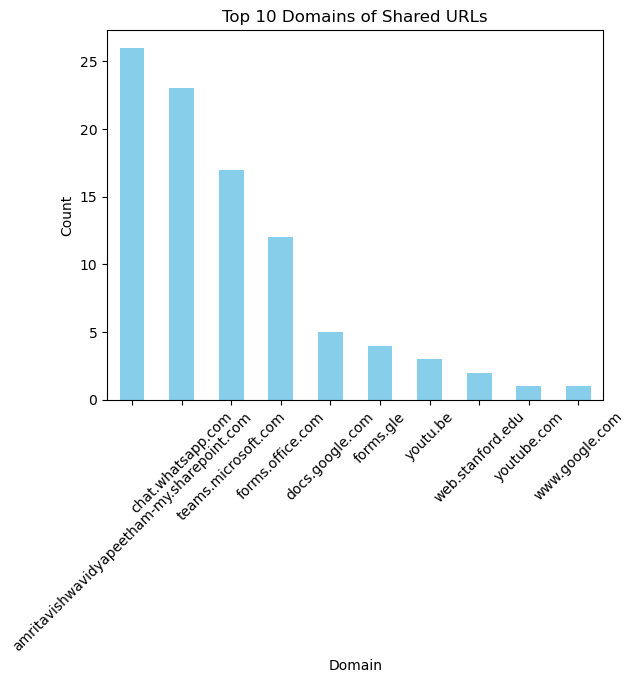

In [39]:
import re
import pandas as pd
from urllib.parse import urlparse
from collections import Counter
import matplotlib.pyplot as plt

# Function to extract media and URLs from messages
def extract_media_and_urls(chat_data):
    media_count = 0
    url_counter = Counter()
    
    # Regex pattern to match chat messages
    pattern = re.compile(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)')
    
    for line in chat_data:
        match = pattern.match(line)
        if match:
            message = match.group(4)
            
            # Check for media files (common extensions)
            if any(ext in message.lower() for ext in ['.jpg', '.jpeg', '.png', '.gif', '.mp4', '.avi', '.mov']):
                media_count += 1
            
            # Extract URLs
            urls = re.findall(r'(https?://[^\s]+)', message)
            for url in urls:
                domain = urlparse(url).netloc
                url_counter[domain] += 1
    
    return media_count, url_counter

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract media count and URLs
media_count, url_counter = extract_media_and_urls(chat_data)

# Display media count
print(f"Number of media files shared: {media_count}")

# Convert URL counter to DataFrame for analysis
df_urls = pd.DataFrame(url_counter.items(), columns=['domain', 'count']).sort_values(by='count', ascending=False)

# Display URL analysis
print("\nURLs Shared (Top 10 domains):")
print(df_urls.head(10))

# Plot URL distribution
plt.figure(figsize=(12, 8))
df_urls.head(10).plot(kind='bar', x='domain', y='count', legend=False, color='skyblue')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.title('Top 10 Domains of Shared URLs')
plt.xticks(rotation=45)
plt.show()


In [40]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 1.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=01314989adf40fe5ce9f314bc925999fbe221a3ee206dbae596d84b1137c1119
  Stored in directory: /Users/asitaponbhvayai/Library/Caches/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


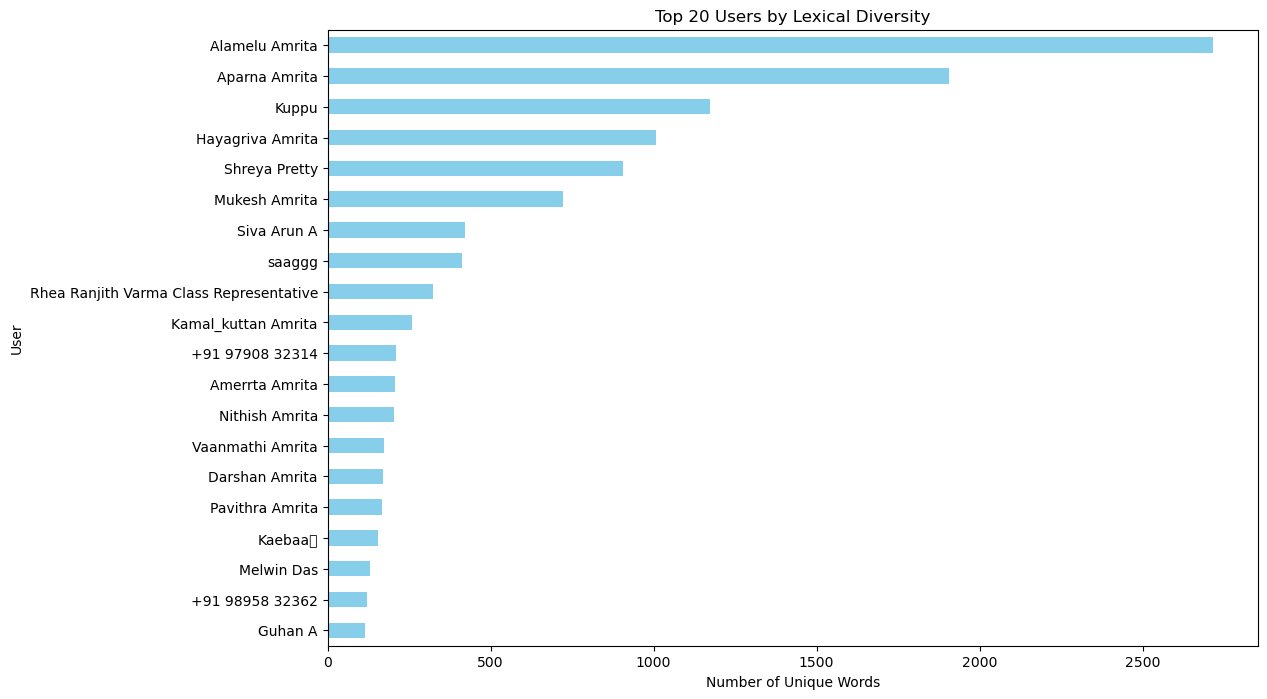

In [43]:
import re
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Preprocessing function to extract sender and message
def preprocess_chat_for_lexical_diversity(chat_data):
    messages = []
    for line in chat_data:
        match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)
        if match:
            sender = match.group(3)
            message = match.group(4)
            messages.append((sender, message))
    return messages

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract sender and message
messages = preprocess_chat_for_lexical_diversity(chat_data)

# Convert messages to DataFrame
df = pd.DataFrame(messages, columns=['sender', 'message'])

# Create a CountVectorizer instance to find unique words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])

# Calculate the number of unique words for each user
df['unique_words'] = X.toarray().sum(axis=1)
df_lexical_diversity = df.groupby('sender')['unique_words'].sum().sort_values(ascending=False)

# Display the top 20 users by lexical diversity
top_20_lexical_diversity = df_lexical_diversity.head(20)

# Plot the top 20 users by lexical diversity
plt.figure(figsize=(12, 8))
top_20_lexical_diversity.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Unique Words')
plt.ylabel('User')
plt.title('Top 20 Users by Lexical Diversity')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


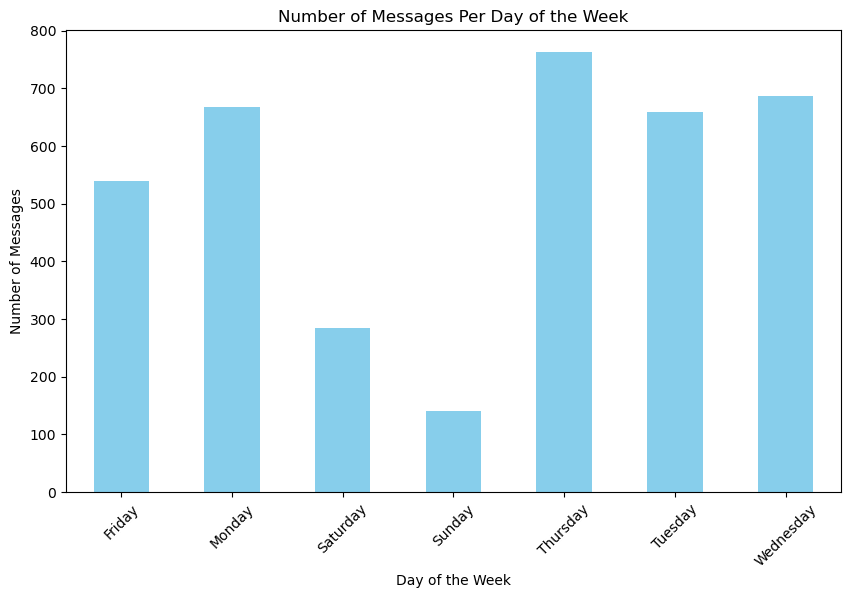

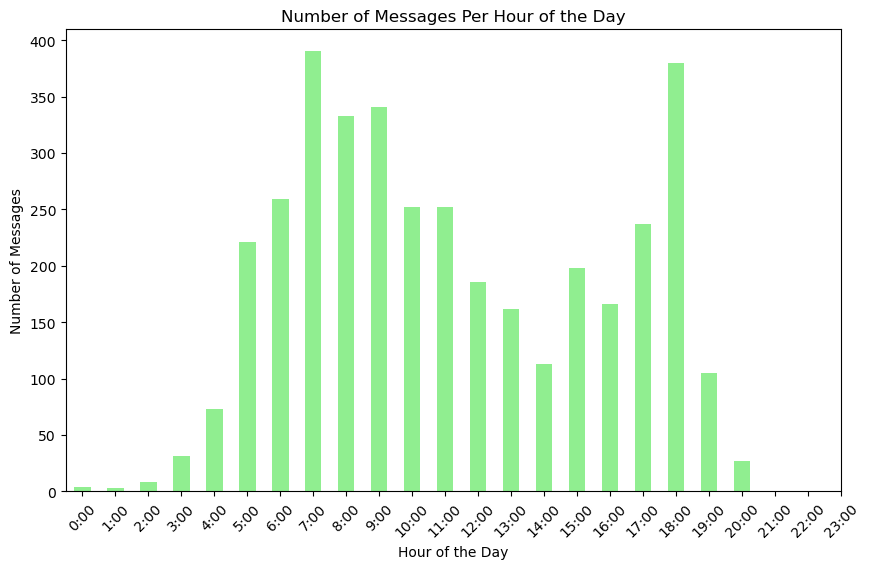

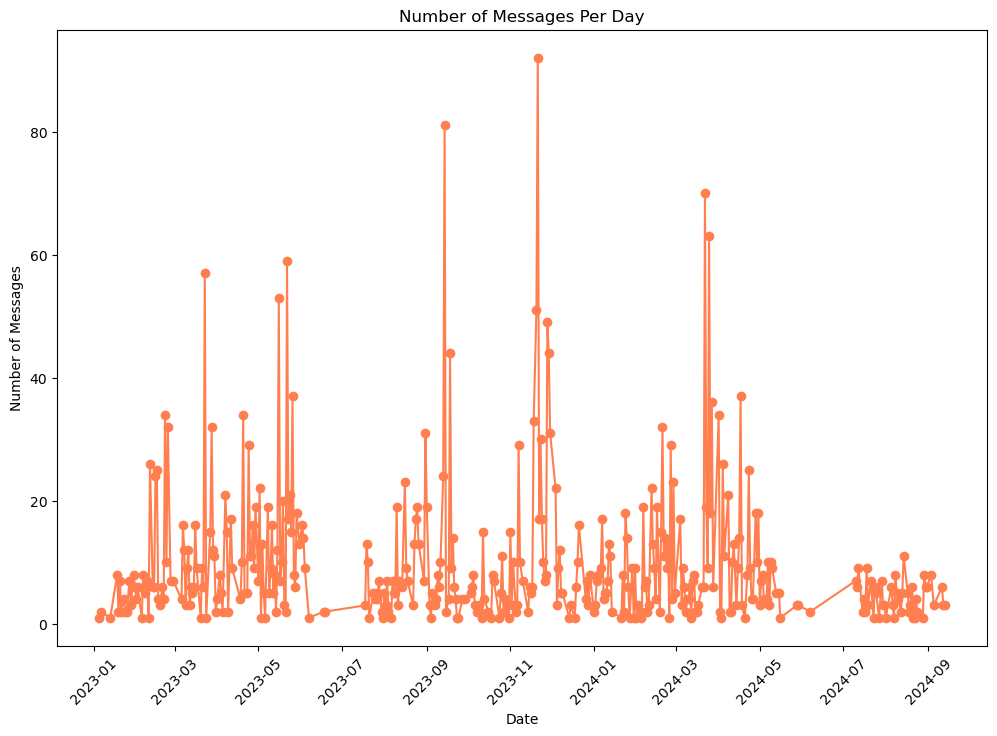

In [45]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Preprocessing function to extract timestamp
def preprocess_chat_for_temporal_patterns(chat_data):
    timestamps = []
    for line in chat_data:
        match = re.match(r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2}) - (.*?): (.*)', line)
        if match:
            timestamp_str = match.group(1) + ', ' + match.group(2)
            # Adjusting the datetime format to match sample data
            try:
                timestamp = datetime.strptime(timestamp_str, '%d/%m/%y, %H:%M')
                timestamps.append(timestamp)
            except ValueError:
                # Handle lines where timestamp parsing fails (e.g., media messages or group changes)
                continue
    return timestamps

# Load WhatsApp chat data from file
with open('WhatsApp Chat.txt', 'r', encoding='utf-8') as file:
    chat_data = file.readlines()

# Extract timestamps
timestamps = preprocess_chat_for_temporal_patterns(chat_data)

# Convert timestamps to DataFrame
df = pd.DataFrame({'timestamp': timestamps})

# Extract day of the week and hour of the day
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour_of_day'] = df['timestamp'].dt.hour

# 1. Day of the Week Analysis
day_of_week_counts = df['day_of_week'].value_counts().sort_index()

# Plot the number of messages per day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Per Day of the Week')
plt.xticks(rotation=45)
plt.show()

# 2. Time of Day Analysis
hour_of_day_counts = df['hour_of_day'].value_counts().sort_index()

# Plot the number of messages per hour of the day
plt.figure(figsize=(10, 6))
hour_of_day_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Per Hour of the Day')
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)], rotation=45)
plt.show()

# 3. Conversation Bursts
daily_counts = df['timestamp'].dt.date.value_counts().sort_index()

# Plot the number of messages per day
plt.figure(figsize=(12, 8))
daily_counts.plot(kind='line', marker='o', color='coral')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Per Day')
plt.xticks(rotation=45)
plt.show()
